#Importing

In [702]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix
import plotly.offline as py
import plotly.express as px
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
sns.set(style='darkgrid')
pd.options.display.max_rows=10
pd.options.display.max_columns=10

#Getting Data

In [703]:
dataset=pd.read_csv('/content/sample_data/CarPrice_Assignment.csv')
df=dataset.copy()

#1. Introduction

The data pertains to the US market for cars. It introduces some features that may have a relation to car prices that will help in predicting prices of the cars in ML.

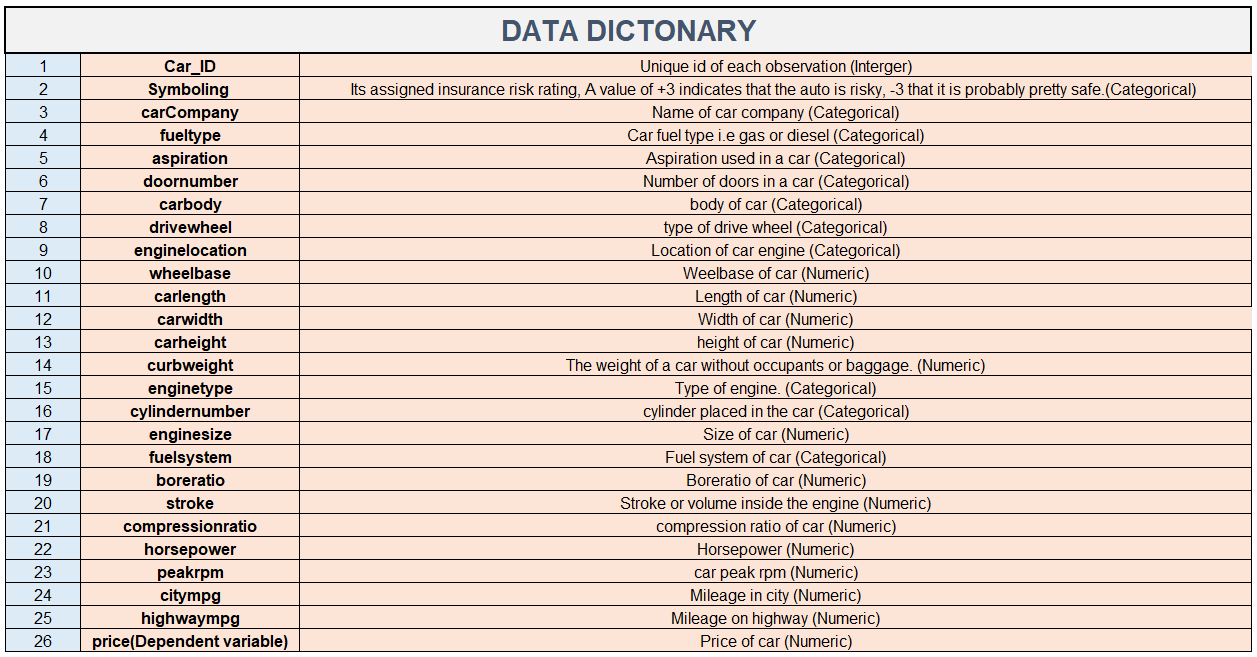


# 2. Exploratory Data Analysis

Showing a sample of the dataset.

In [704]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,...,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,...,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,...,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,...,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,...,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,...,115,5500,18,22,17450.0


In [705]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observations:-**

- There are 205 entries in the dataset.
- There are no nulls.
- We have columns of "object" datatype. If any of them is needed in ML, we will apply encoding on it.


In [706]:
def data_info(data):
    cols=[]
    unique_val=[]
    n_uniques=[]
    dtypes=[]
    nulls=[]
    dups=[]
    for col in data.columns:
        cols.append(col)
        dtypes.append(data[col].dtype)
        unique_val.append(np.array(data[col].value_counts().head(10).index))
        n_uniques.append(data[col].nunique())
        nulls.append(data[col].isnull().sum())
        dups.append(data.duplicated().sum())

    return pd.DataFrame({'Cols':cols,'Dtype':dtypes,'N_Uniques':n_uniques,'N_Nan':nulls,'Unique_Values':unique_val,'Duplicated':dups})

In [707]:
pd.options.display.max_rows=None
data_info(df)

,Cols,Dtype,N_Uniques,N_Nan,Unique_Values,Duplicated
0,car_ID,int64,205,0,"[1, 142, 132, 133, 134, 135, 136, 137, 138, 139]",0
1,symboling,int64,6,0,"[0, 1, 2, 3, -1, -2]",0
2,CarName,object,147,0,"[toyota corona, toyota corolla, peugeot 504, s...",0
3,fueltype,object,2,0,"[gas, diesel]",0
4,aspiration,object,2,0,"[std, turbo]",0
5,doornumber,object,2,0,"[four, two]",0
6,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",0
7,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
8,enginelocation,object,2,0,"[front, rear]",0
9,wheelbase,float64,53,0,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",0


**Observations:-**

- No duplicated.
- No Nan.


## Categorical Features

In [708]:
Categorical_Features=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
len(Categorical_Features)

9

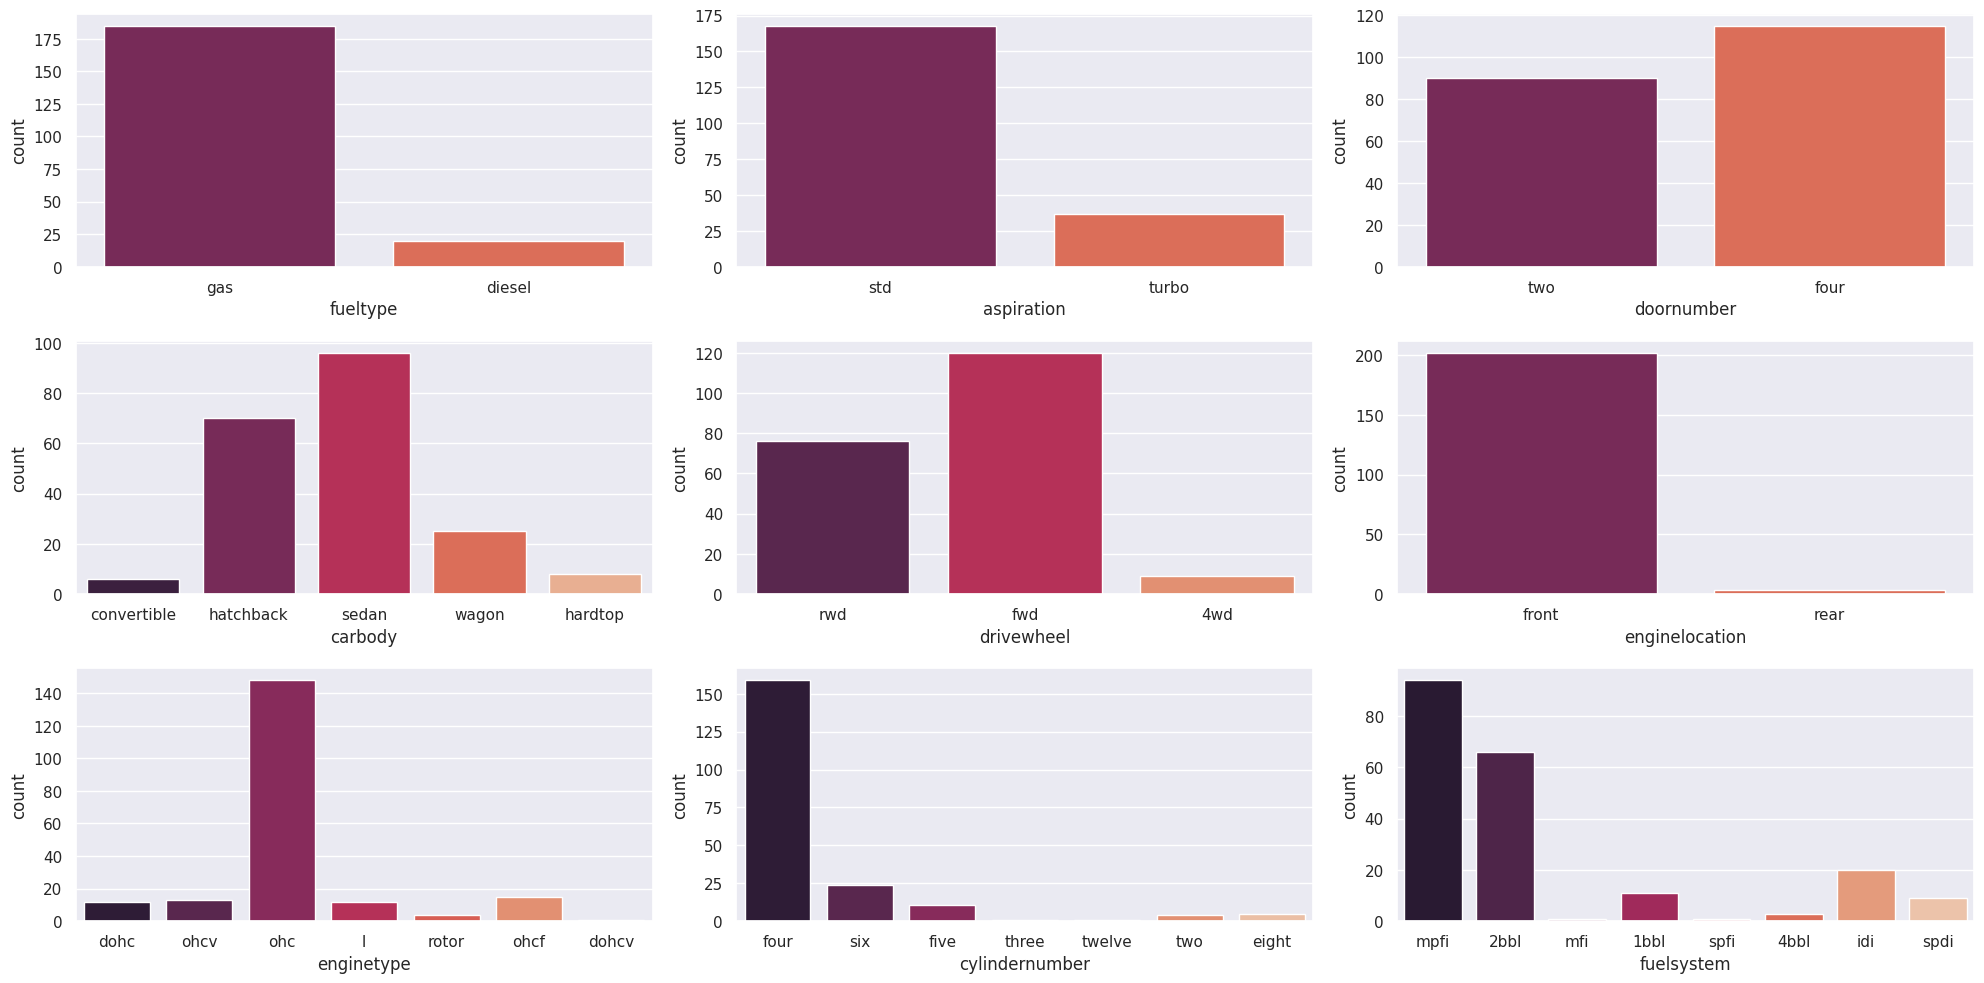

In [709]:
plt.figure(figsize=(20, 10))
for i in range(len(Categorical_Features)):
    plots = plt.subplot(3, 3, i+1)
    sns.countplot(x=df[Categorical_Features[i]],palette="rocket",hue=df[Categorical_Features[i]])

plt.tight_layout()
plt.show()

## Numerical Features

In [710]:
Numerical_Features=['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
len(Numerical_Features)

15

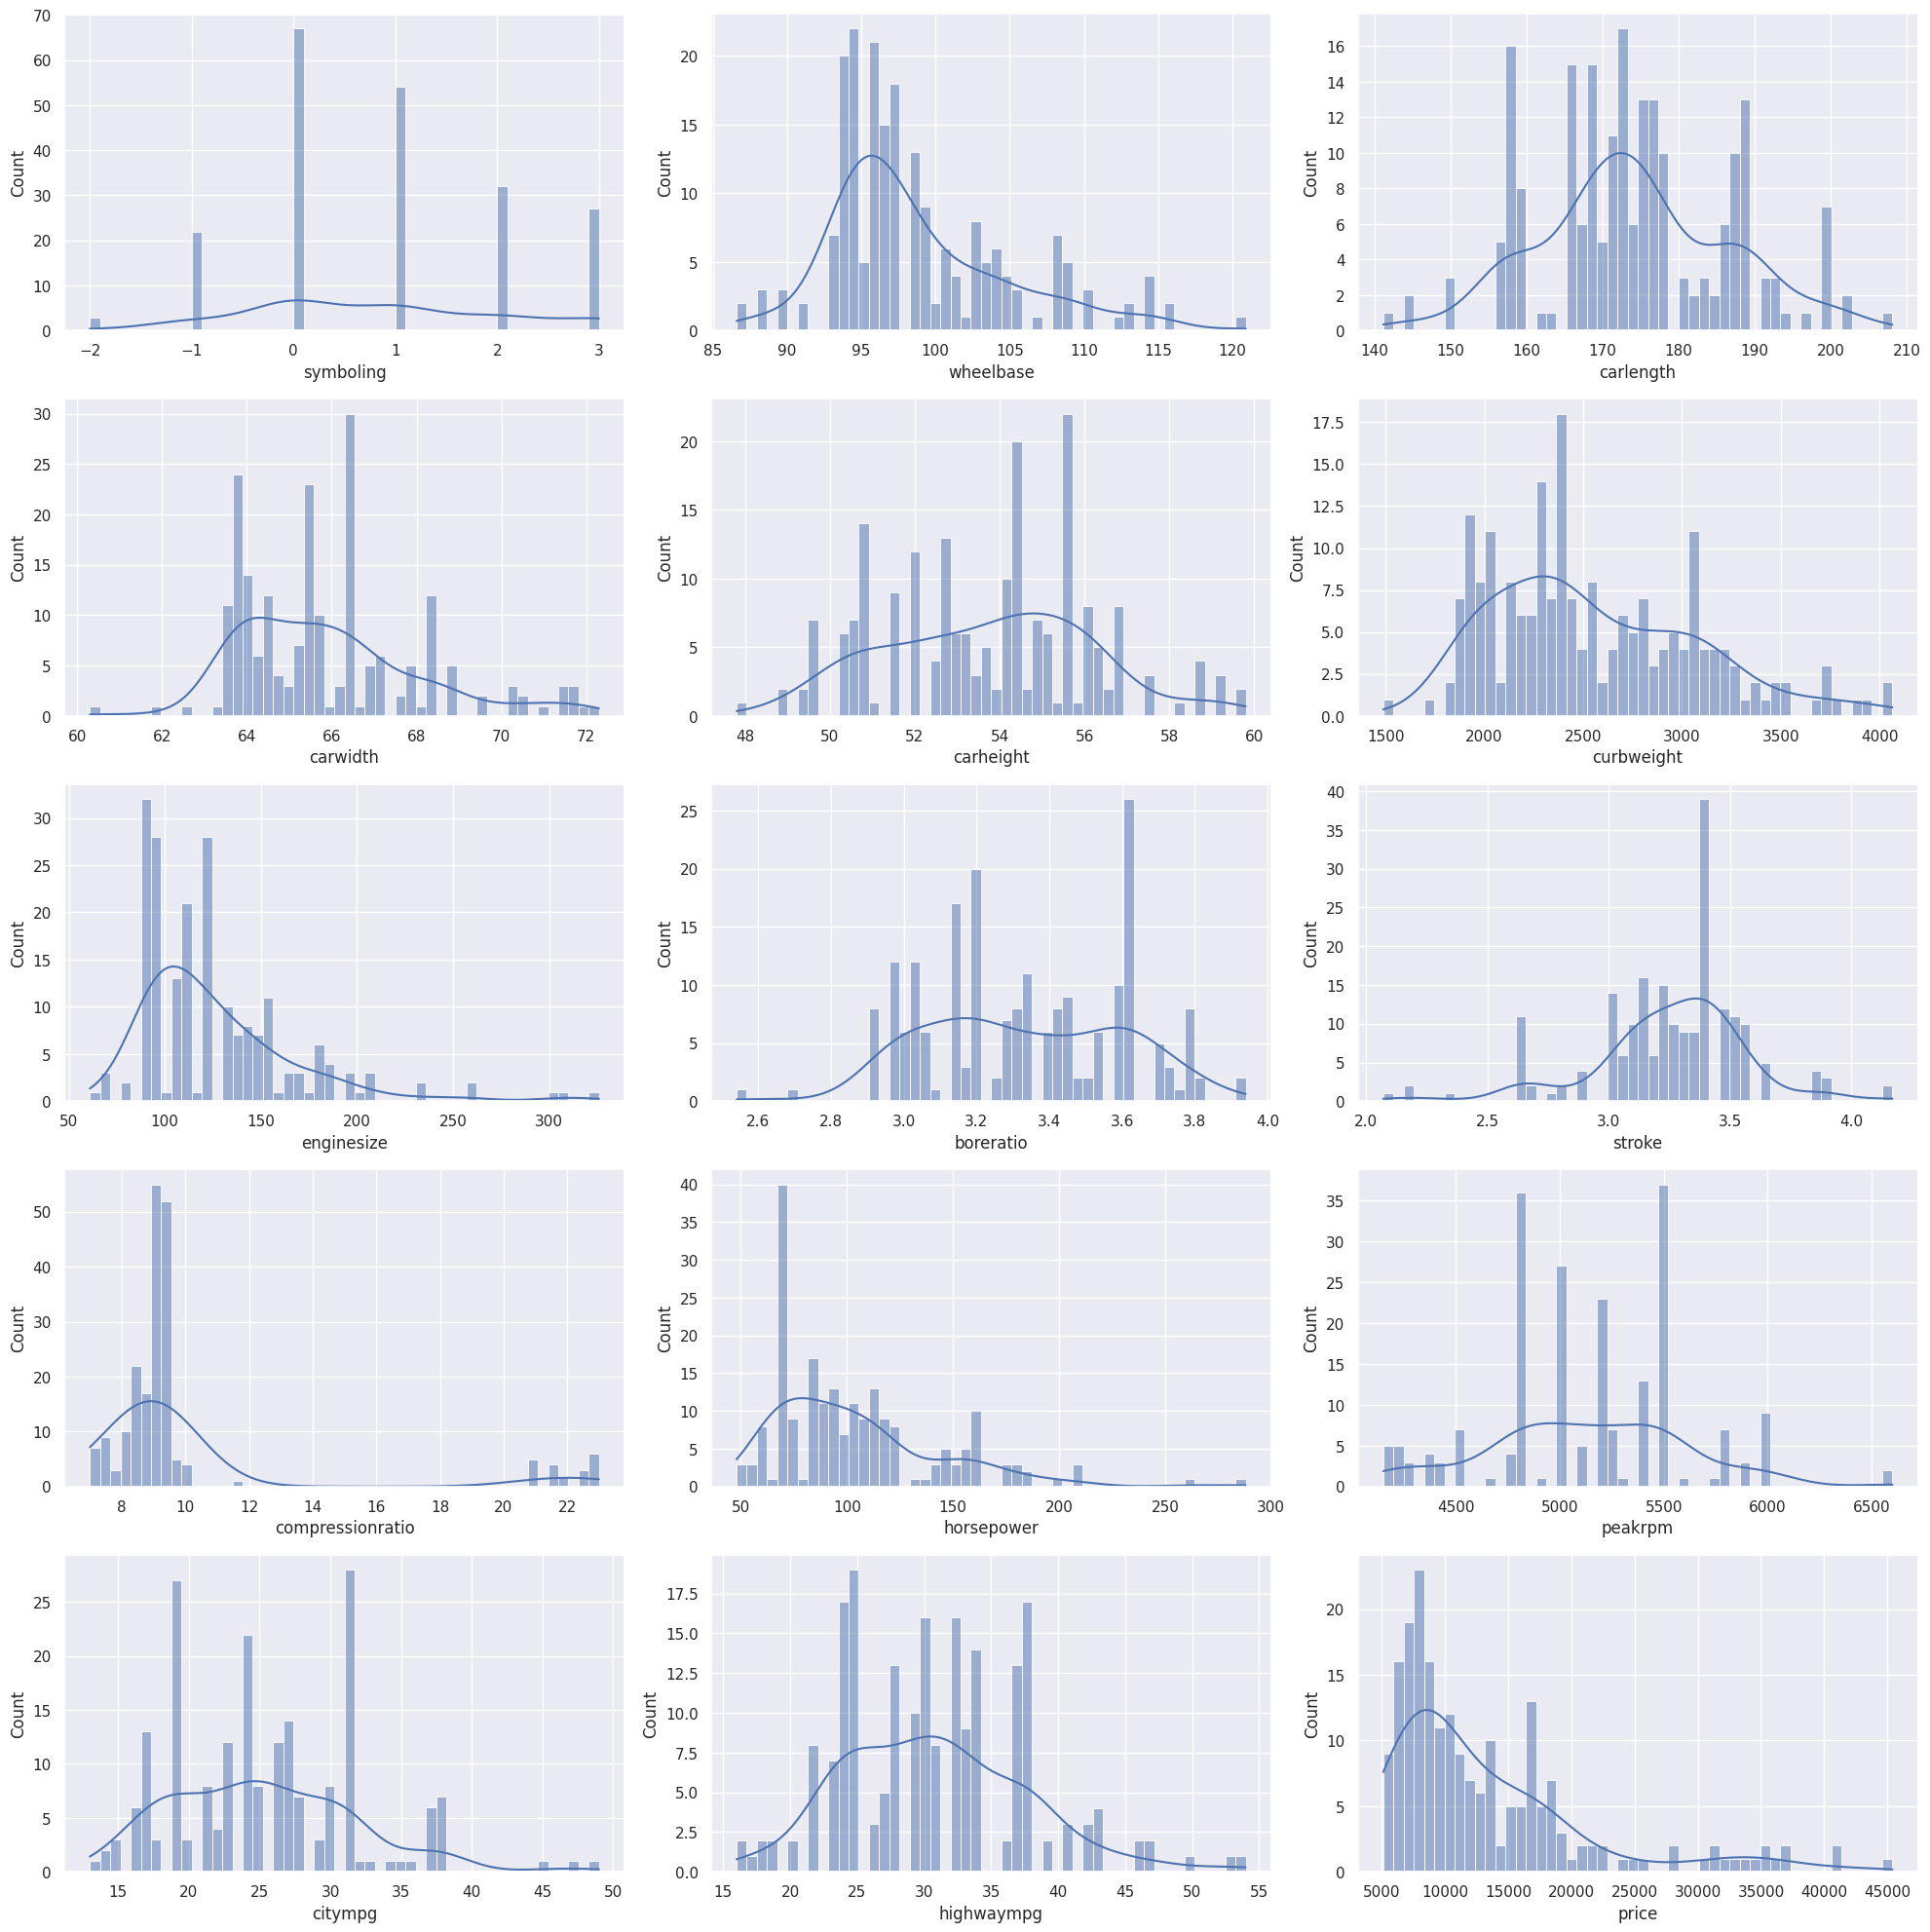

In [711]:
plt.figure(figsize=(20,20))
for i in range(len(Numerical_Features)):
    plots = plt.subplot(5,3,i+1)
    sns.histplot(x=df[Numerical_Features[i]],bins=50,kde=True)

plt.tight_layout()
plt.show()

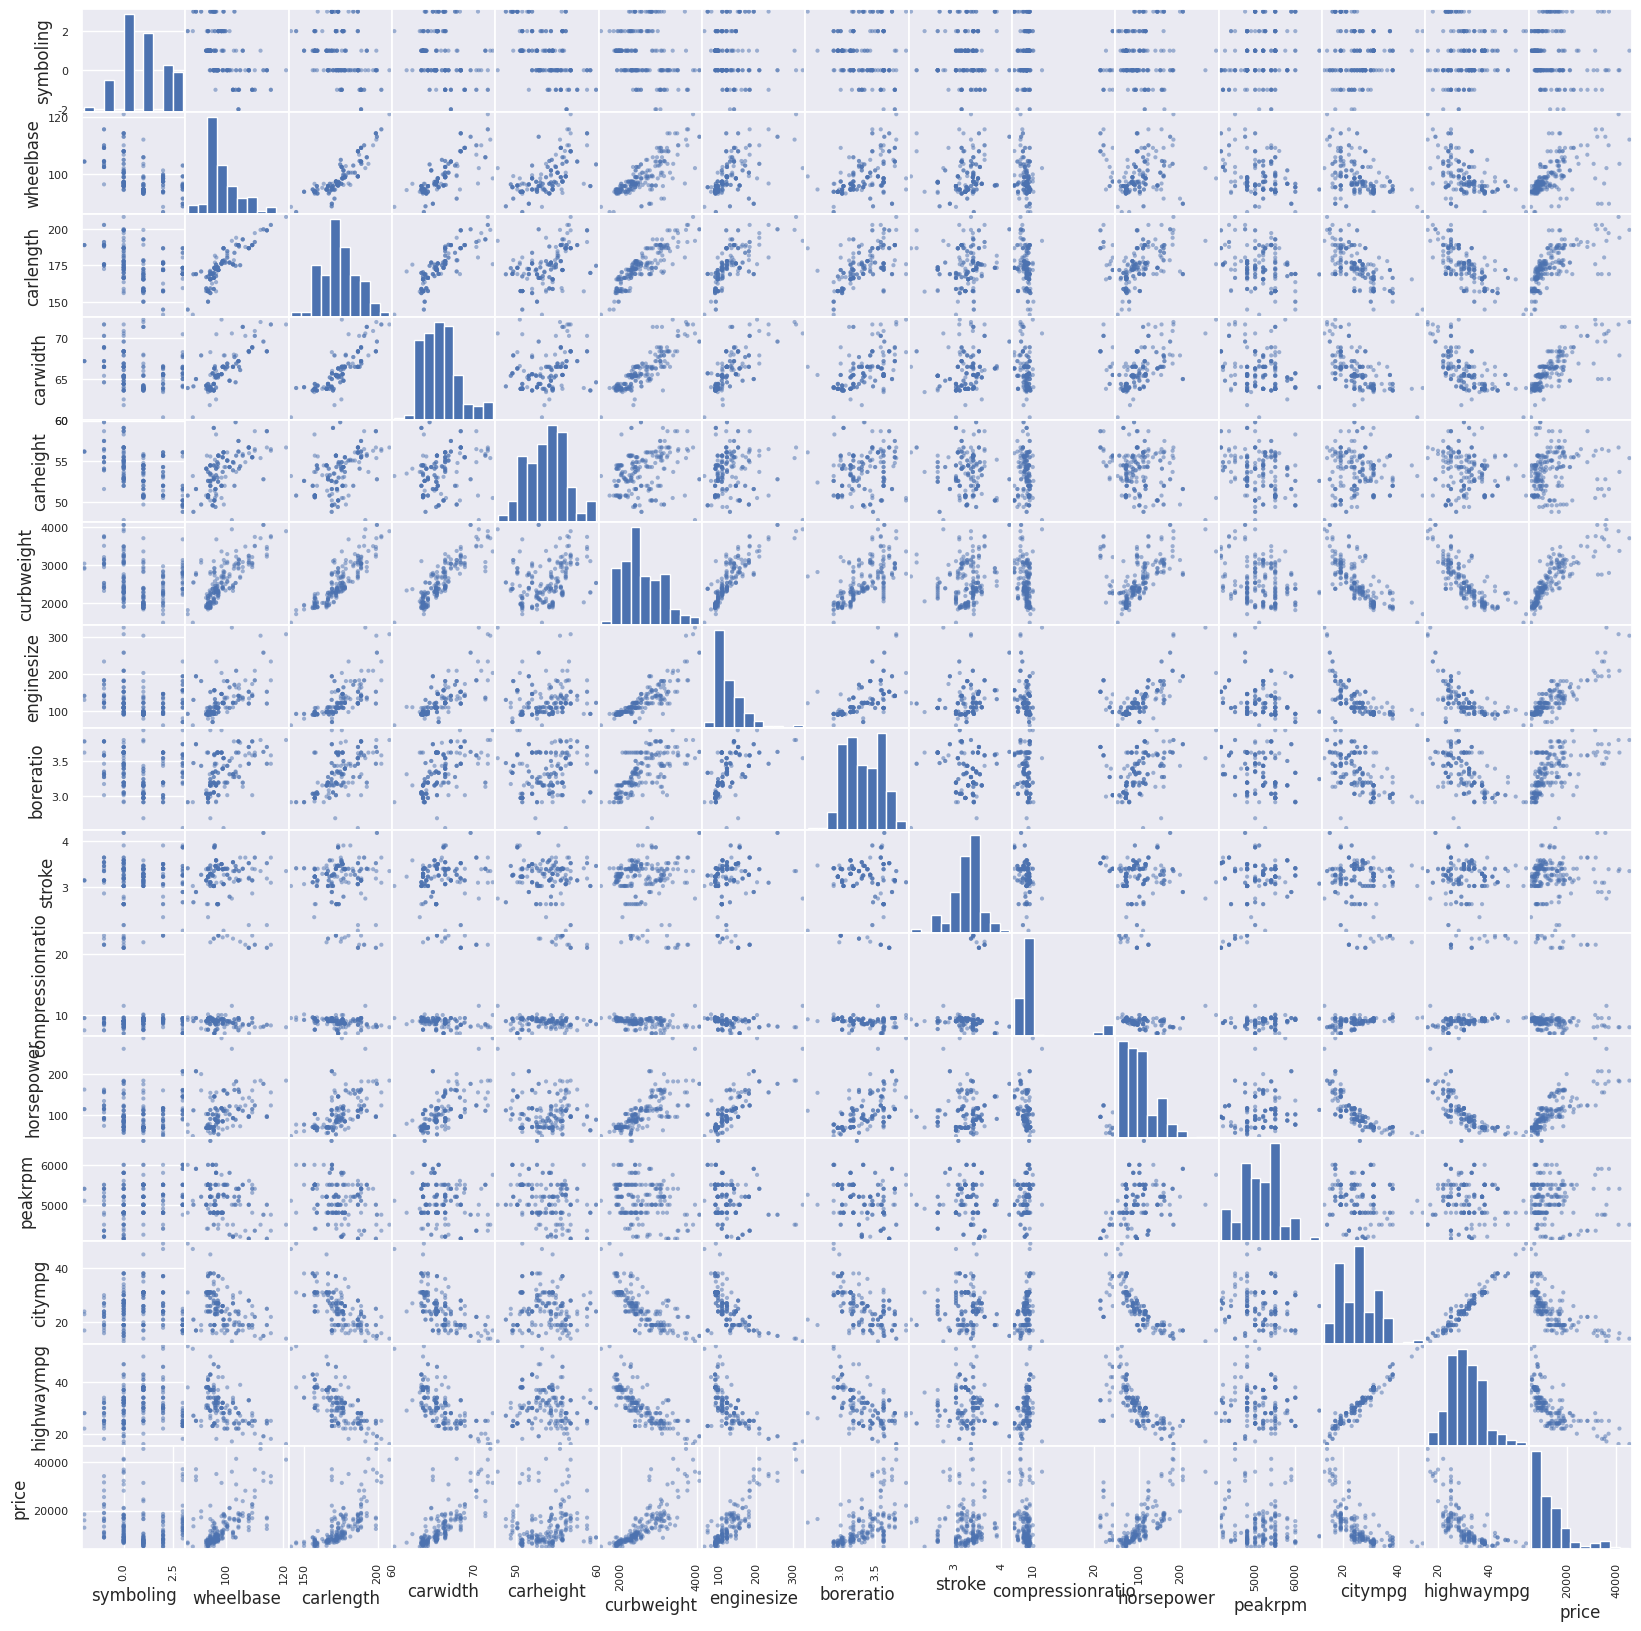

In [712]:
scatter_matrix(df[Numerical_Features],figsize=(20,20))
plt.show()

**Observations:-**

- The price has positive relation with Horsepower, Bore ratio, Engine size, curbweight, and car dimensions.

###Skewness:

In [713]:
df[Numerical_Features].skew(numeric_only=True).sort_values(ascending=False)

compressionratio    2.610862
enginesize          1.947655
price               1.777678
horsepower          1.405310
wheelbase           1.050214
carwidth            0.904003
curbweight          0.681398
citympg             0.663704
highwaympg          0.539997
symboling           0.211072
carlength           0.155954
peakrpm             0.075159
carheight           0.063123
boreratio           0.020156
stroke             -0.689705
dtype: float64

**Observations:-**

- Most of the columns are right-skew.
- There is only 1 left-skewed column.

## Categorical Features With Numerical Features

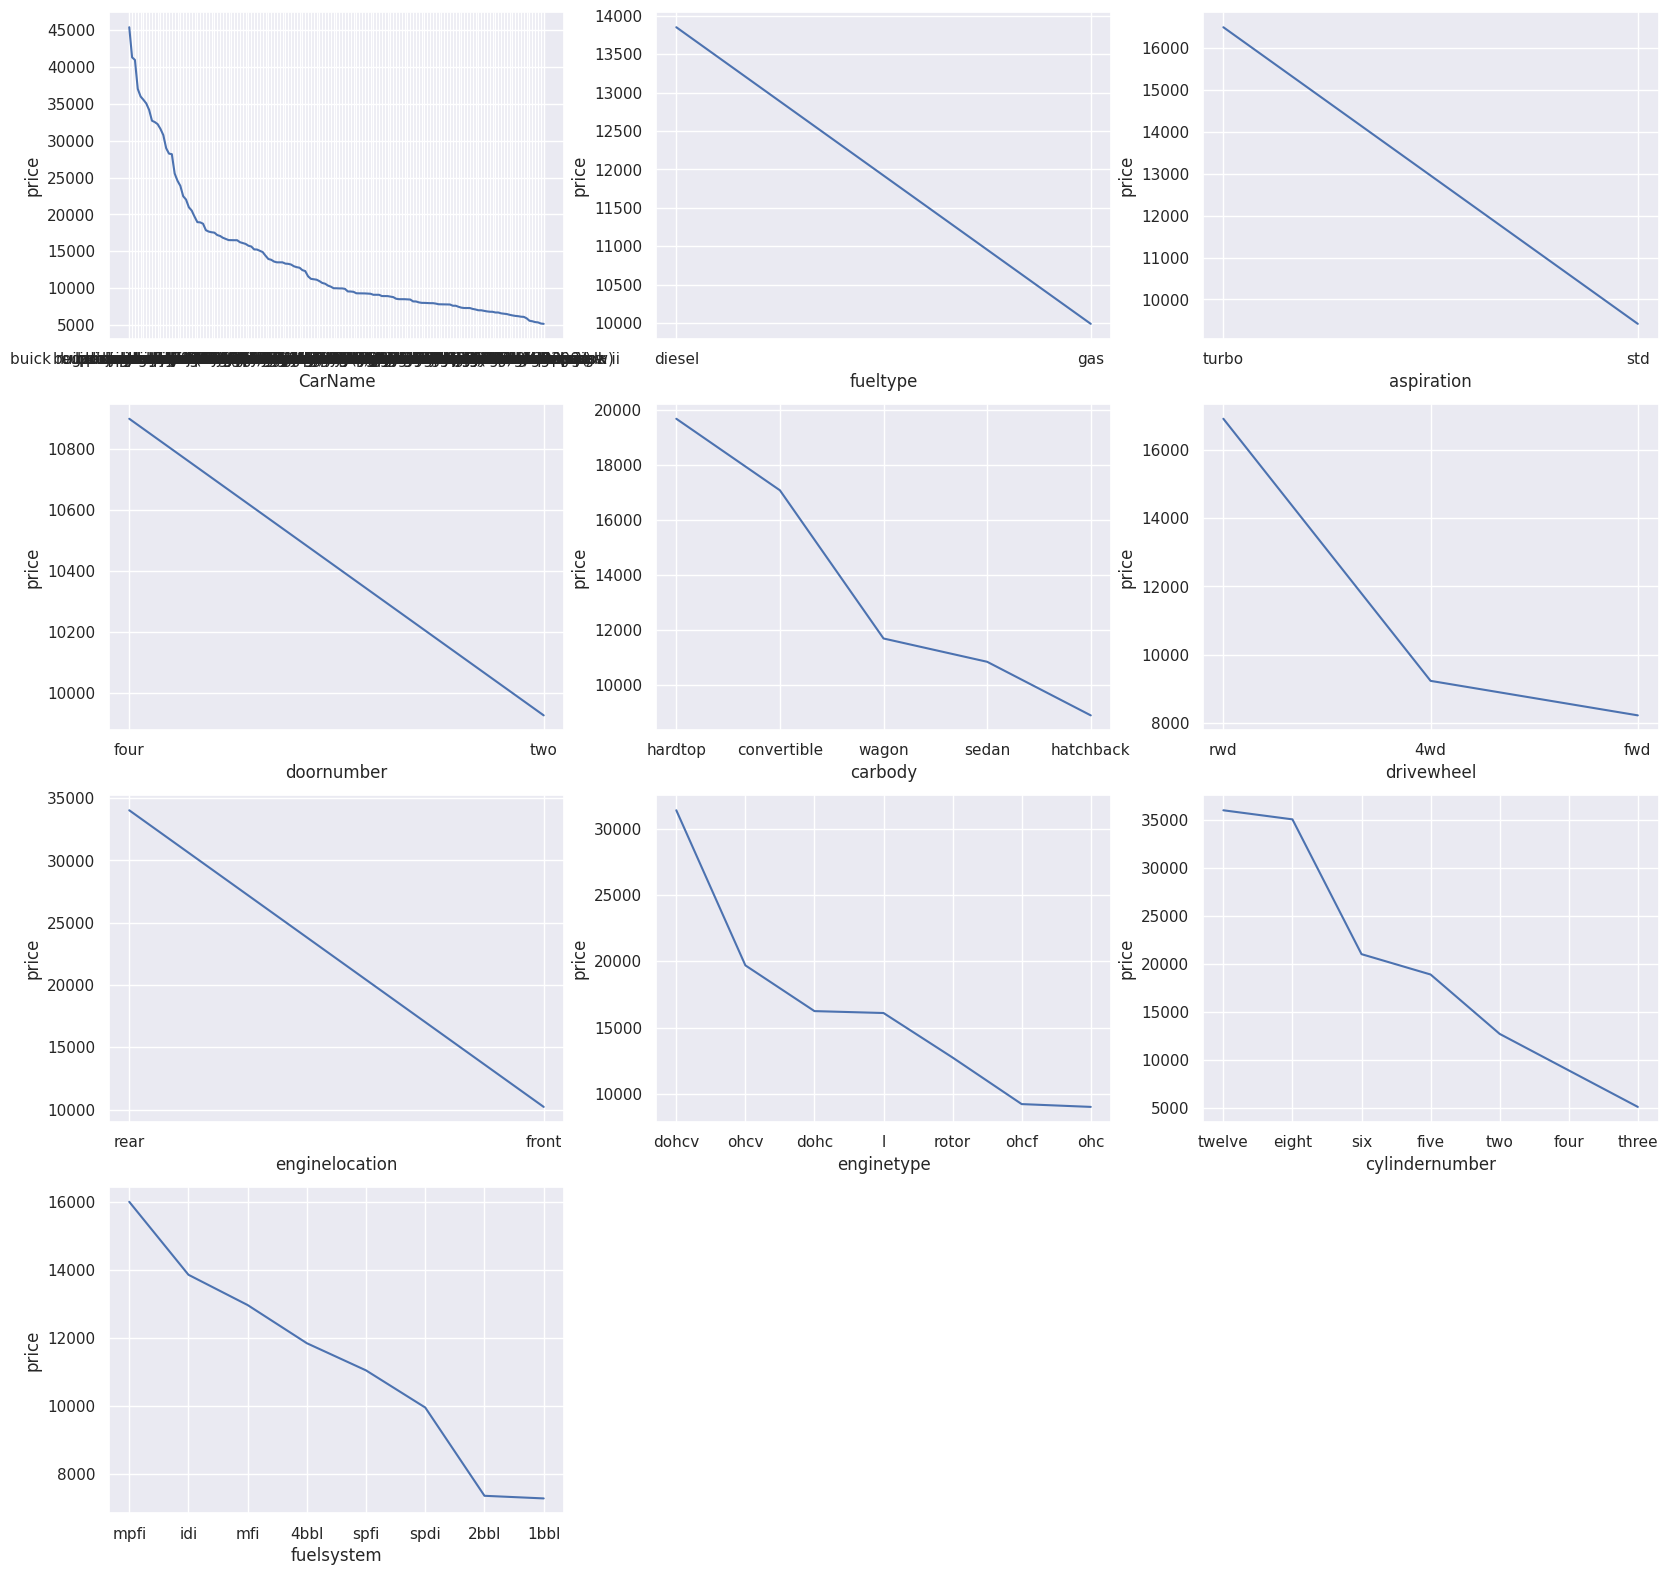

In [714]:
def line_plots(data,target):
  object_columns=data.select_dtypes(include=['object'])
  plt.figure(figsize=(20,50))

  for i,column in enumerate(object_columns.columns):
    grouped_data = data.groupby(column)[target].median()
    sorted_data = grouped_data.sort_values(ascending=False)
    plt.subplot(10,3,i+1)
    sns.lineplot(sorted_data);

line_plots(df,'price')

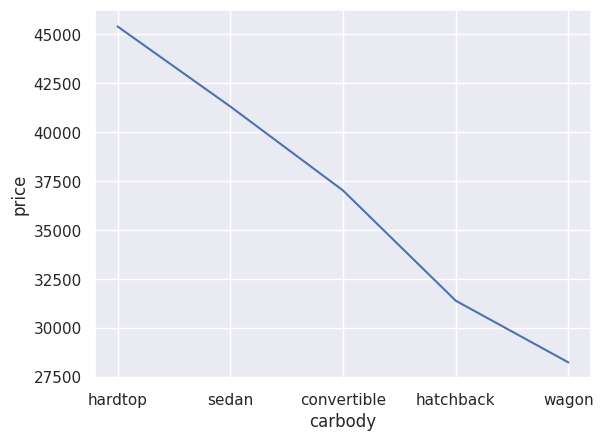

In [715]:
grouped_data = df.groupby('carbody')['price'].max()
sorted_data = grouped_data.sort_values(ascending=False)
sns.lineplot(sorted_data);

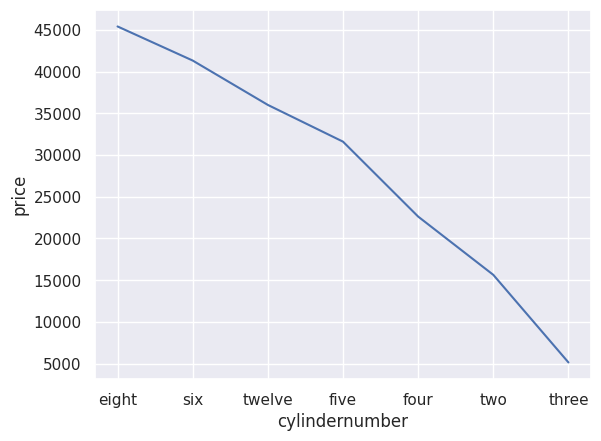

In [716]:
grouped_data = df.groupby('cylindernumber')['price'].max()
sorted_data = grouped_data.sort_values(ascending=False)
sns.lineplot(sorted_data);

**Observations:-**

- Cylindernumber will be encoded with label Encoder
- Car body will be encoded with Ordinal Encoder

##Detection of Outliers & Nulls

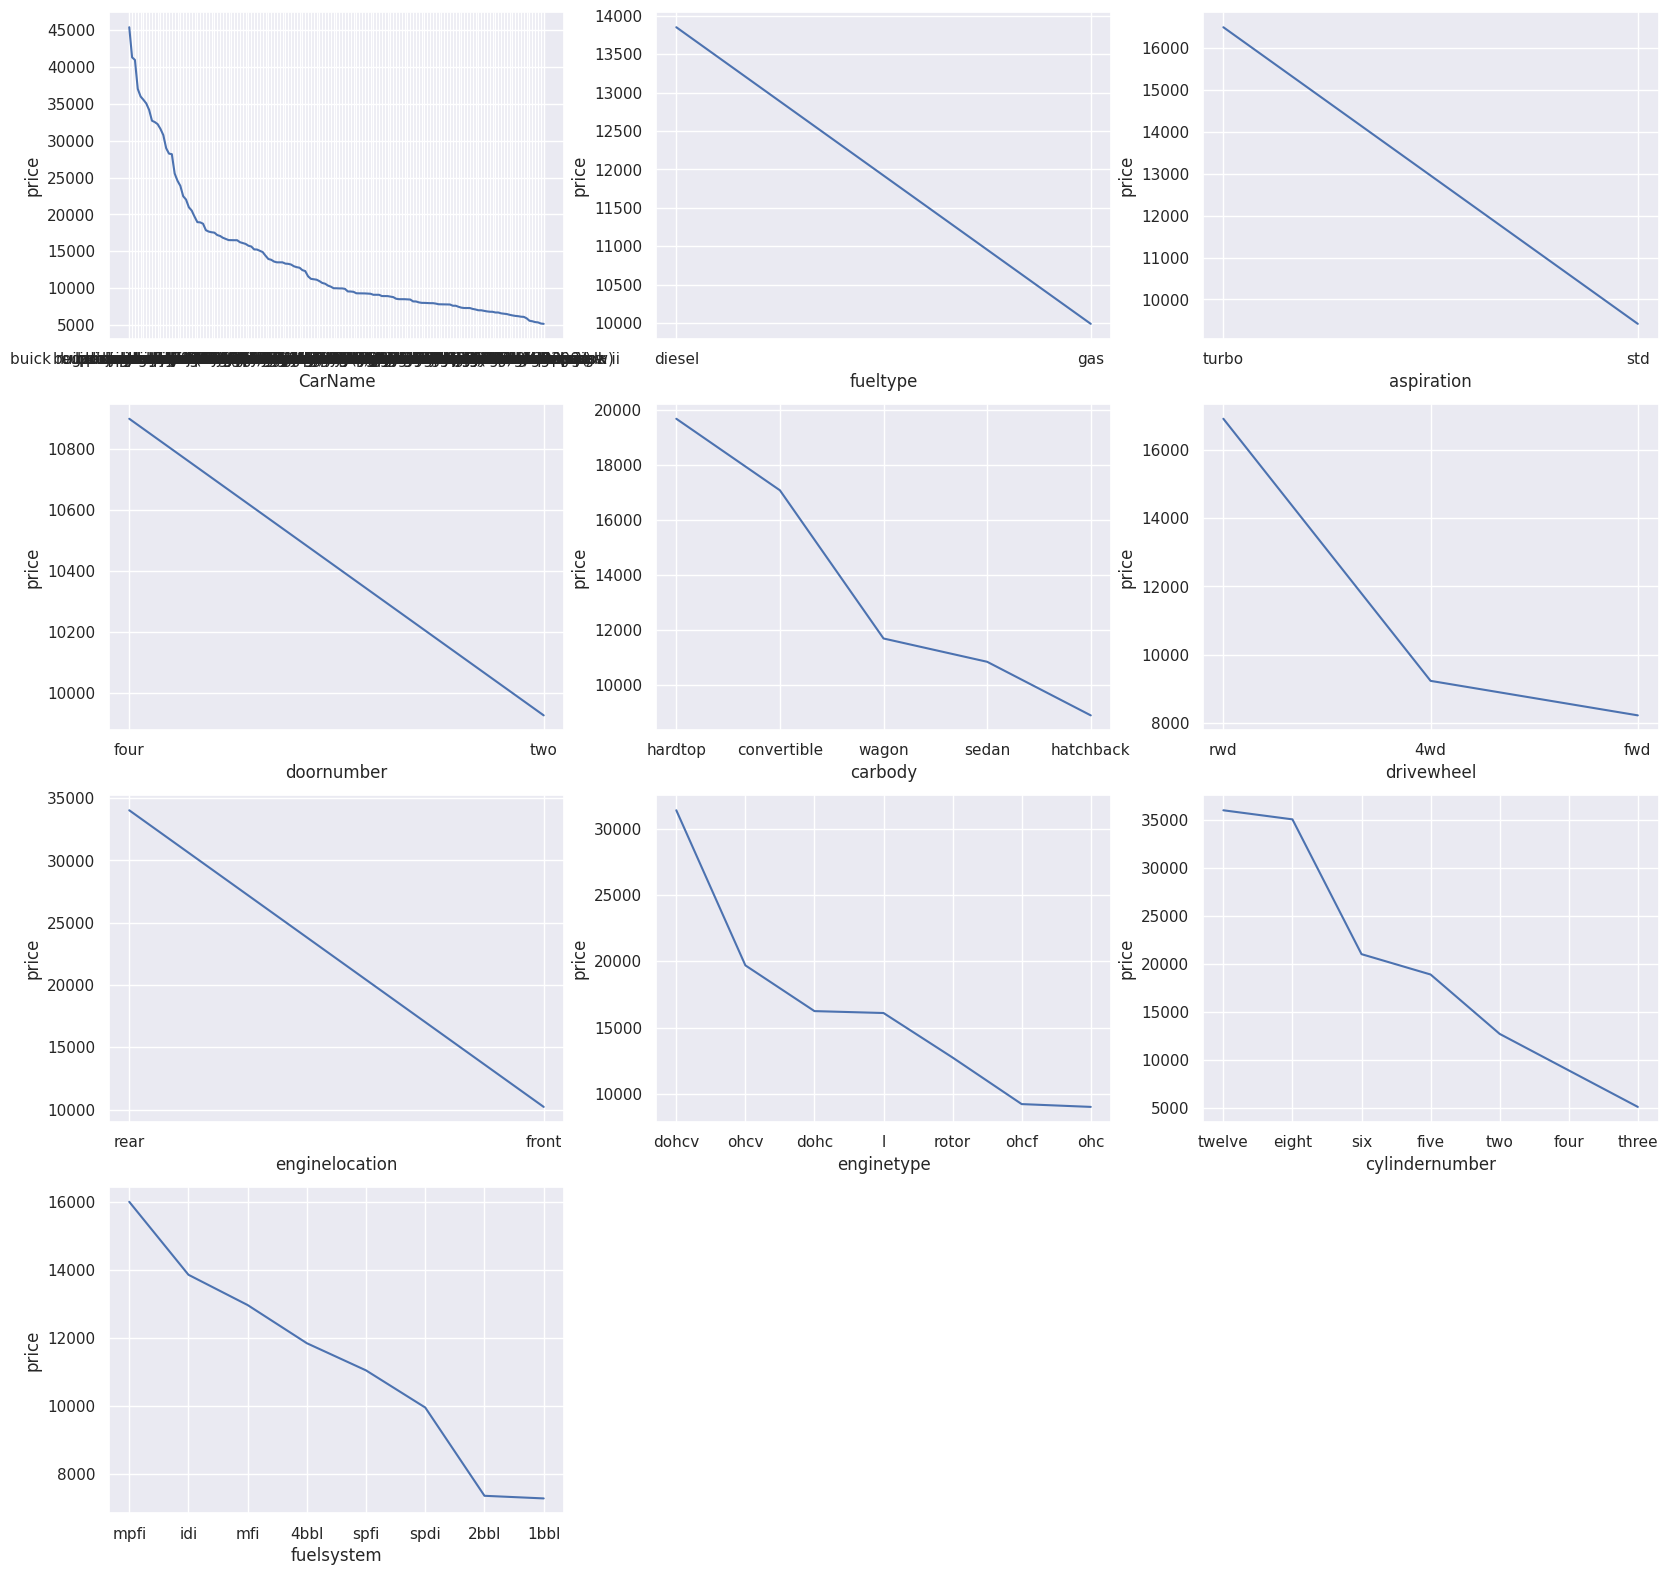

In [717]:
def line_plots(data,target):
  object_columns=data.select_dtypes(include=['object'])
  plt.figure(figsize=(20,50))

  for i,column in enumerate(object_columns.columns):
    grouped_data = data.groupby(column)[target].median()
    sorted_data = grouped_data.sort_values(ascending=False)
    plt.subplot(10,3,i+1)
    sns.lineplot(sorted_data);

line_plots(df,'price')

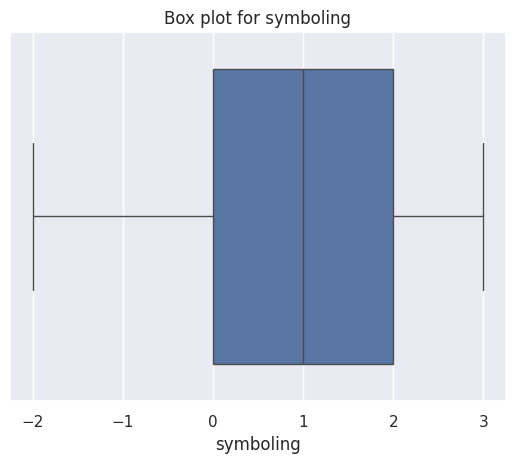

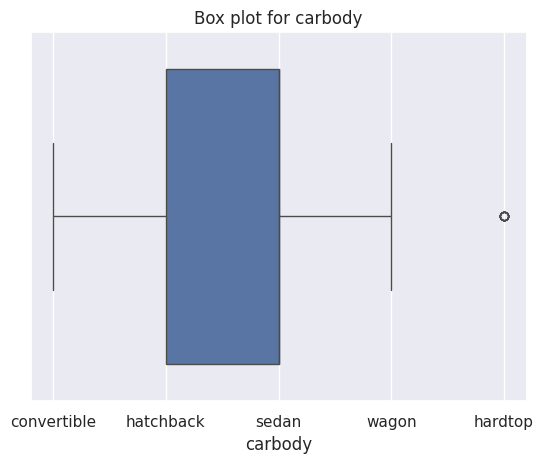

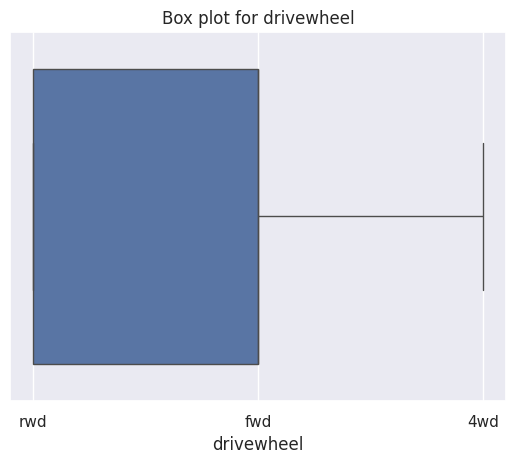

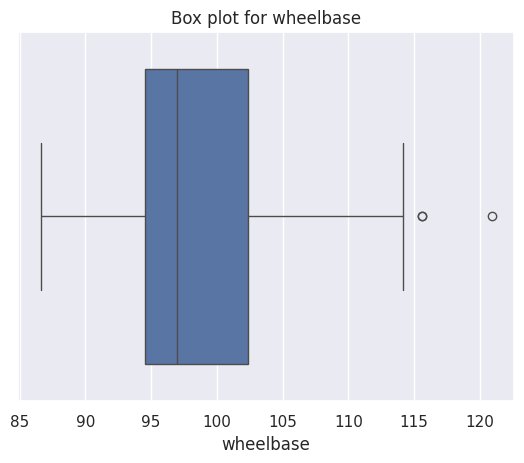

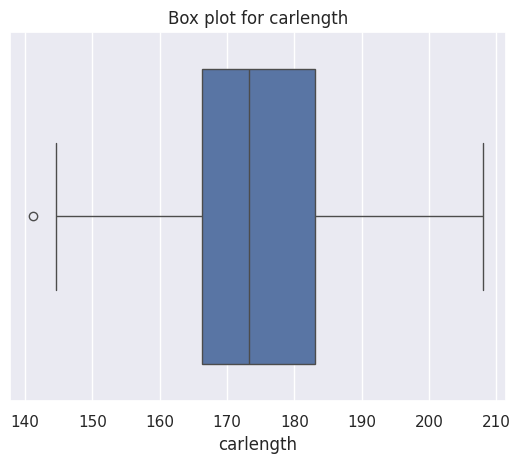

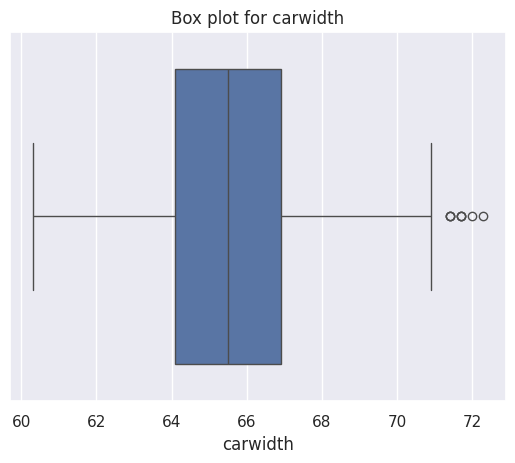

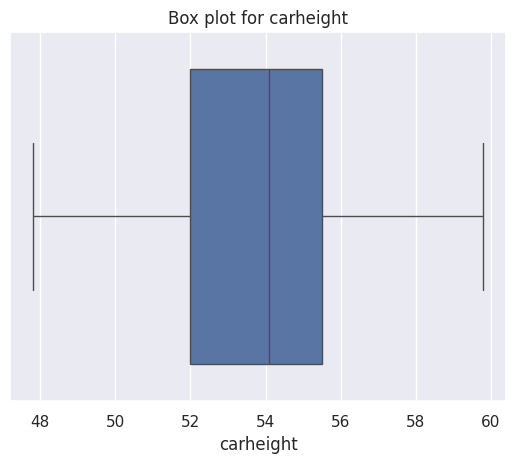

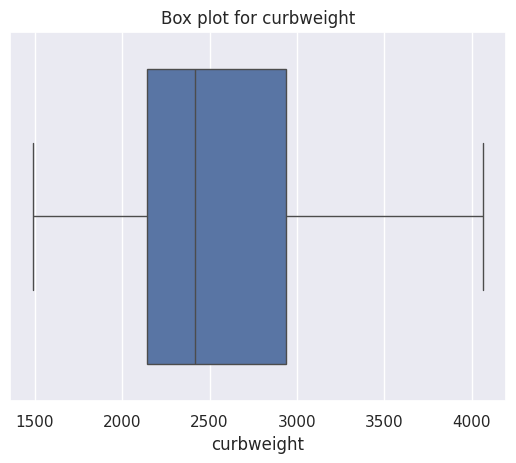

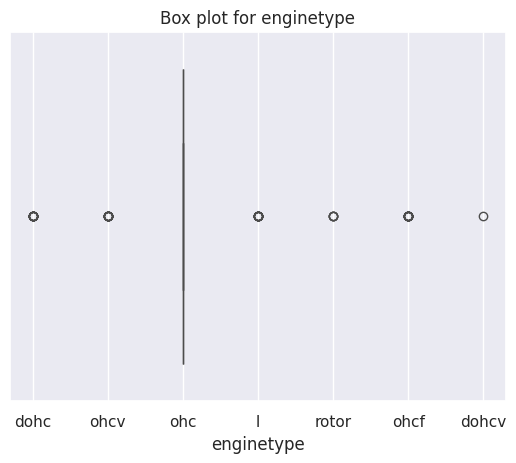

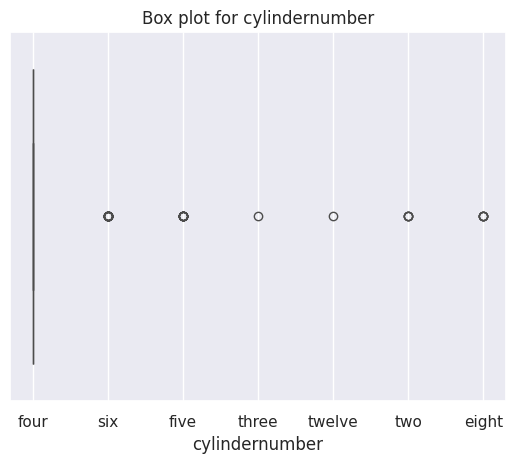

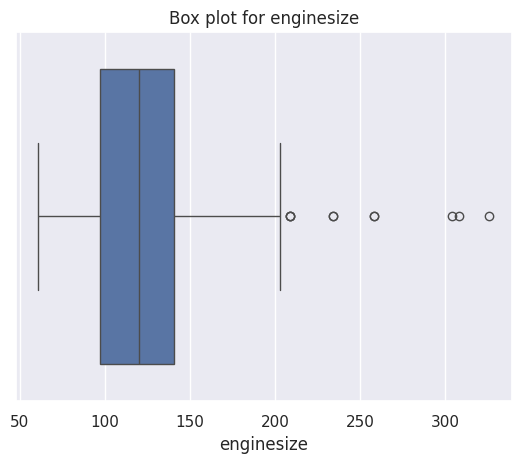

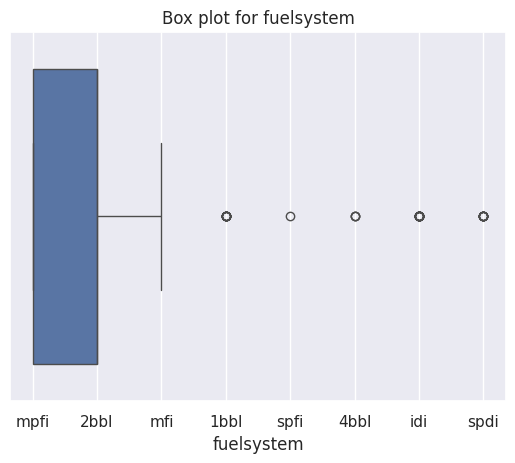

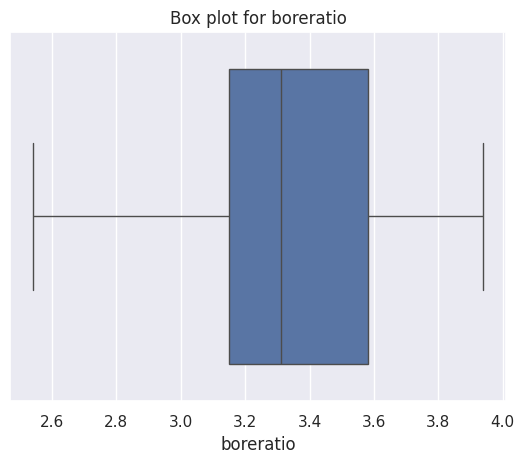

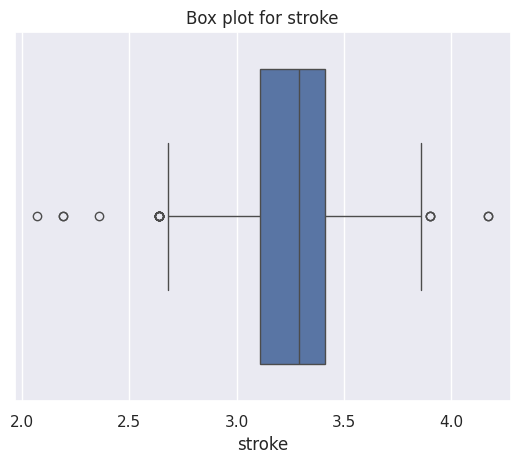

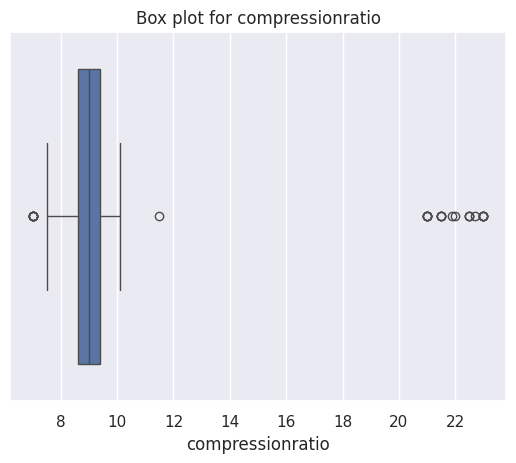

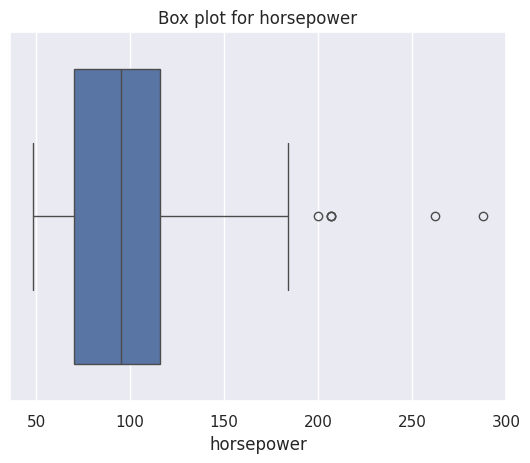

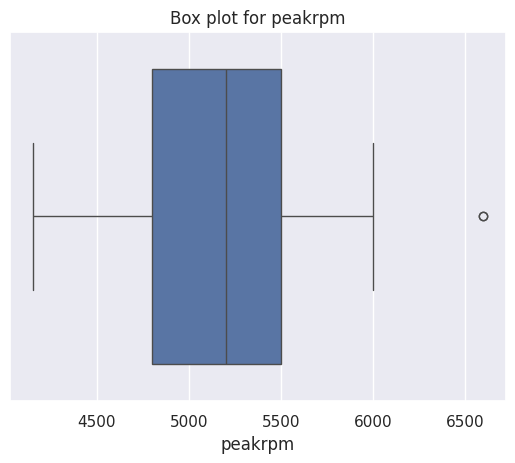

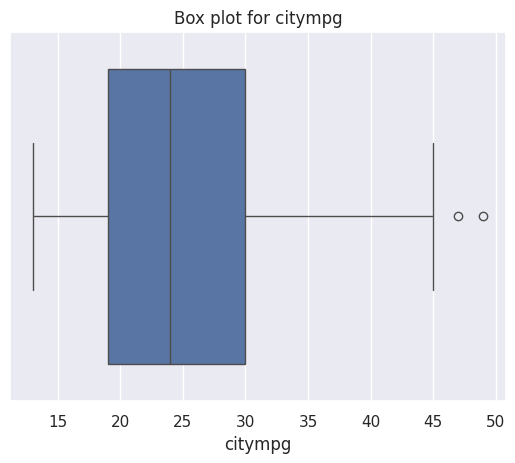

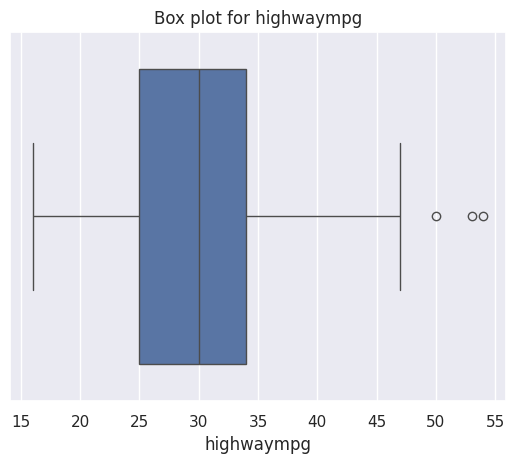

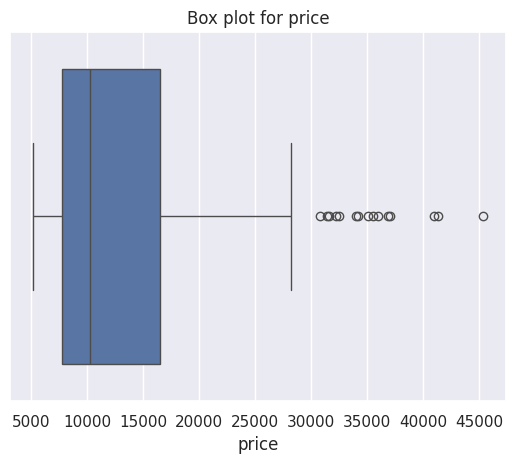

In [718]:
col_boxplot=['symboling','carbody','drivewheel','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber',
             'enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

for column in df[col_boxplot]:
  sns.boxplot(x=df[column])
  plt.title(f'Box plot for {column}')
  plt.show()


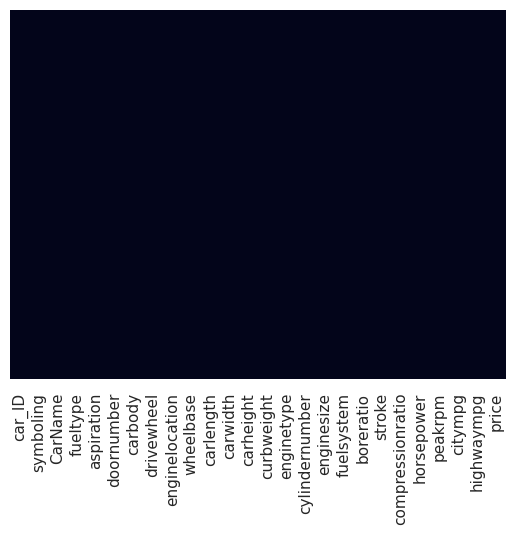

In [719]:
sns.heatmap(df.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [720]:
df['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

**Observations:-**

- Engine Type has value "l" that is meaningless.

## Correlation

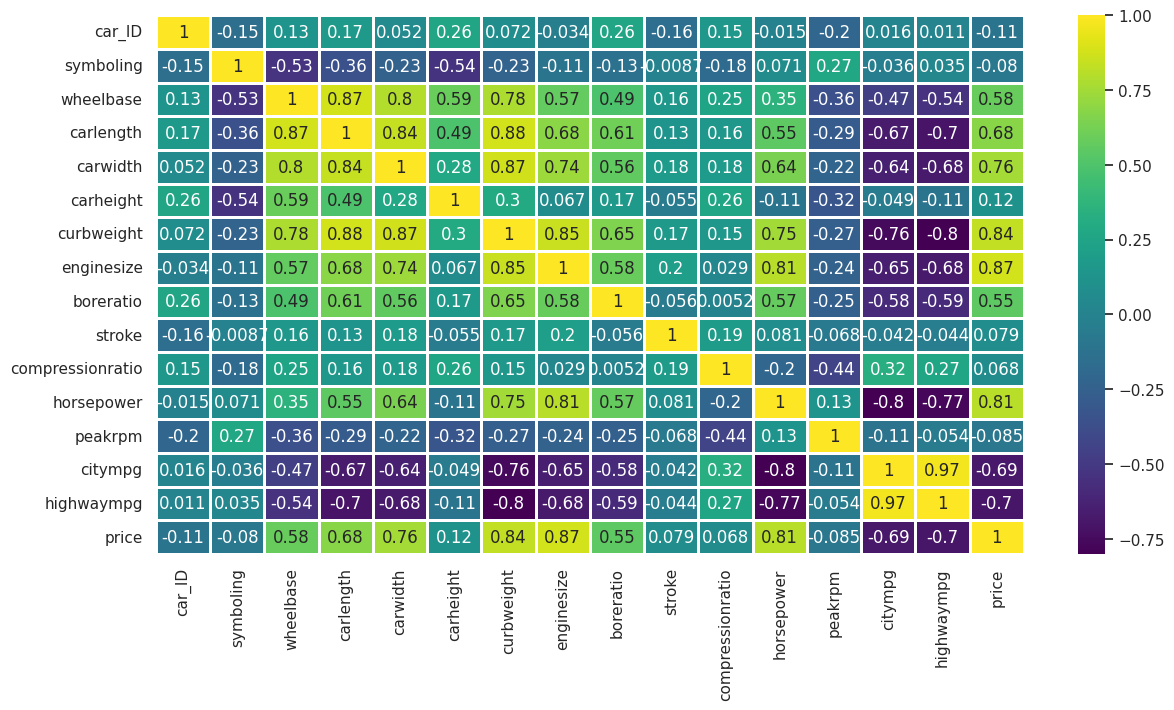

In [721]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True,linewidths=2,cmap='viridis')
plt.show()

**Observations:-**

- There is a strong positive relation between Price and (Horsepower,Boreratio, Enginesize, Curbweight, Car dimensions(length-width-height)).
- There is a strong negative relation between price and (Highwaympg, Citympg).


# 3. Data Cleaning

### Handing misssing Values (NaN)

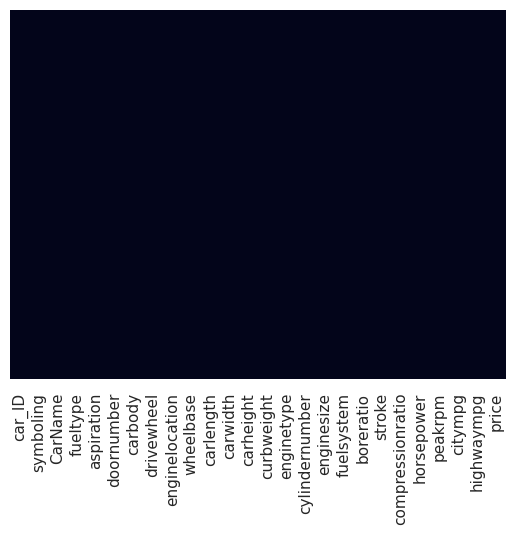

In [722]:
sns.heatmap(df.isnull() ,yticklabels=False,cbar=False,cmap="rocket");

In [723]:
df1=df.copy()
df1['enginetype'].mode()

0    ohc
Name: enginetype, dtype: object

In [724]:
df1['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [725]:
df1['enginetype'] = df1['enginetype'].replace('l', df['enginetype'].mode()[0])
df1['enginetype'].value_counts()

ohc      160
ohcf      15
ohcv      13
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

## Duplicated

In [726]:
df1.duplicated().sum()

0

## Outlier Dectection (iqr) & Removing

In [727]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [728]:
def remove_outliers_iqr(data,columns):
    sum_of_outliers=0
    for col in columns:
        if data[col].dtype != 'object':
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr= q3-q1
            lower_whisker = q1 - 1.5*iqr
            upper_whisker = q3 + 1.5*iqr
            filt= (data[col]<lower_whisker) | (data[col]>upper_whisker)
            sum_of_outliers+=len(data[filt].index)
            data=data.drop(data[filt].index,axis=0)
    print(f'Number of outliers= {sum_of_outliers}')
    data.reset_index(drop=True,inplace=True)
    return data

In [729]:
col_boxplot1=['wheelbase','carlength','carwidth','enginesize','stroke',
             'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [730]:
df1=remove_outliers_iqr(df1,col_boxplot1)

Number of outliers= 80


In [731]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            125 non-null    int64  
 1   symboling         125 non-null    int64  
 2   CarName           125 non-null    object 
 3   fueltype          125 non-null    object 
 4   aspiration        125 non-null    object 
 5   doornumber        125 non-null    object 
 6   carbody           125 non-null    object 
 7   drivewheel        125 non-null    object 
 8   enginelocation    125 non-null    object 
 9   wheelbase         125 non-null    float64
 10  carlength         125 non-null    float64
 11  carwidth          125 non-null    float64
 12  carheight         125 non-null    float64
 13  curbweight        125 non-null    int64  
 14  enginetype        125 non-null    object 
 15  cylindernumber    125 non-null    object 
 16  enginesize        125 non-null    int64  
 1

## Outlier Dectection (Z Score) & Removing

In [732]:
df2=df.copy()

In [733]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [734]:
col_boxplot2=['wheelbase','carlength','carwidth','enginesize','stroke',
             'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [735]:
for col in col_boxplot2:
  outliers=df2[((df2[col] - df2[col].mean() ) / df2[col].std()<-2) | ((df2[col] - df2[col].mean() ) / df2[col].std()>2)].index
  df2=df2.drop(outliers,axis=0)

In [736]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 200
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            106 non-null    int64  
 1   symboling         106 non-null    int64  
 2   CarName           106 non-null    object 
 3   fueltype          106 non-null    object 
 4   aspiration        106 non-null    object 
 5   doornumber        106 non-null    object 
 6   carbody           106 non-null    object 
 7   drivewheel        106 non-null    object 
 8   enginelocation    106 non-null    object 
 9   wheelbase         106 non-null    float64
 10  carlength         106 non-null    float64
 11  carwidth          106 non-null    float64
 12  carheight         106 non-null    float64
 13  curbweight        106 non-null    int64  
 14  enginetype        106 non-null    object 
 15  cylindernumber    106 non-null    object 
 16  enginesize        106 non-null    int64  
 1

## Removing Irrelevant Columns

In [737]:
df1=df1.drop(['car_ID','CarName',],axis=1)

In [738]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         125 non-null    int64  
 1   fueltype          125 non-null    object 
 2   aspiration        125 non-null    object 
 3   doornumber        125 non-null    object 
 4   carbody           125 non-null    object 
 5   drivewheel        125 non-null    object 
 6   enginelocation    125 non-null    object 
 7   wheelbase         125 non-null    float64
 8   carlength         125 non-null    float64
 9   carwidth          125 non-null    float64
 10  carheight         125 non-null    float64
 11  curbweight        125 non-null    int64  
 12  enginetype        125 non-null    object 
 13  cylindernumber    125 non-null    object 
 14  enginesize        125 non-null    int64  
 15  fuelsystem        125 non-null    object 
 16  boreratio         125 non-null    float64
 1

## Skewness

In [739]:
pd.options.display.max_rows=None
columns_skew=df1.skew(numeric_only=True).sort_values(ascending=False)
columns_skew

wheelbase           1.046100
horsepower          0.962537
price               0.808010
enginesize          0.798097
carwidth            0.613281
boreratio           0.497919
curbweight          0.423268
citympg             0.258318
carheight           0.246266
highwaympg          0.171459
peakrpm             0.152091
symboling           0.037612
carlength           0.021469
compressionratio   -0.444881
stroke             -0.475491
dtype: float64

In [740]:
pd.options.display.max_rows=10
pd.options.display.max_columns=10

In [741]:
def logTrans(data,features):
    numeric_features = data.select_dtypes(include=[np.number]).columns
    for feature in features:
        logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])
        plt.figure(figsize=(15,6))
        plt.subplot(1,2,1)
        plt.title(f"Distribution of {feature} before Transformation", fontsize=15)
        sns.histplot(data[feature], kde=True, color="red")
        plt.subplot(1,2,2)

        df_log = pd.DataFrame(logTr.fit_transform(data))
        plt.title(f"Distribution of {feature} after Transformation", fontsize=15)
        sns.histplot(df_log,bins=20, kde=True , legend=False)
        plt.xlabel(feature)
        plt.show()
        print(f"Skewness was {round(data[feature].skew(),2)} before & is {round(df_log[0].skew(),2)} after Log transformation.")
        data[feature] = df_log[0]
    return data

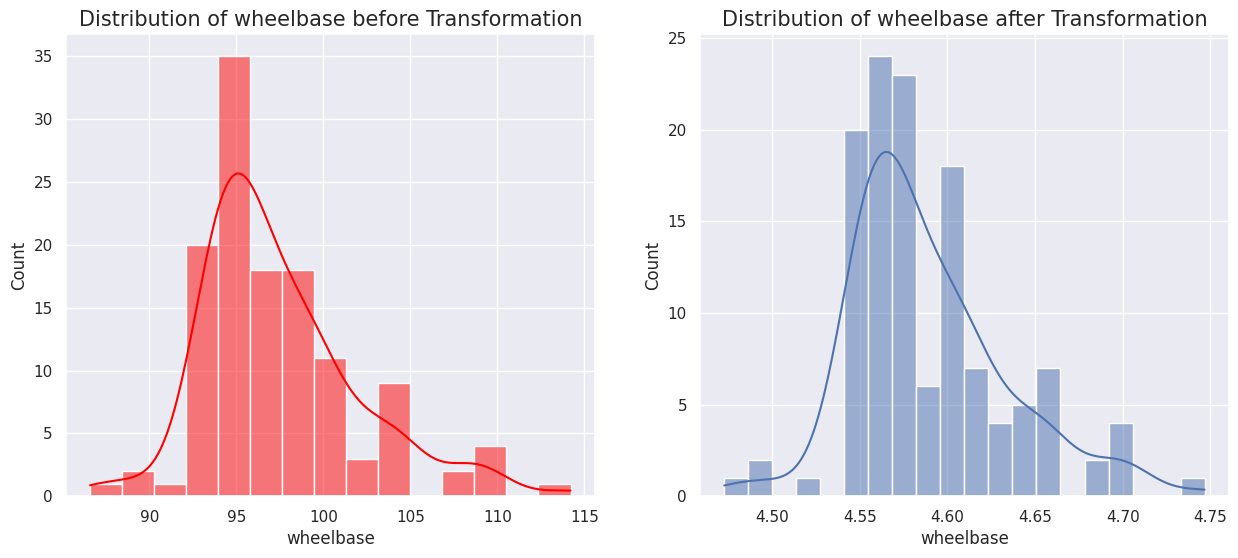

Skewness was 1.05 before & is 0.88 after Log transformation.


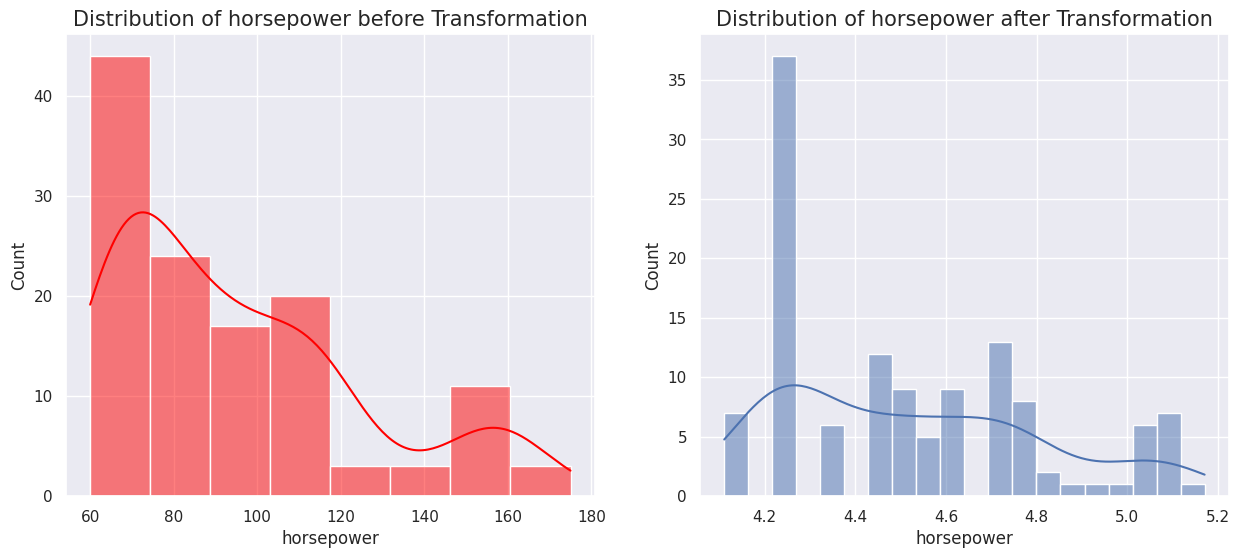

Skewness was 0.96 before & is 0.54 after Log transformation.


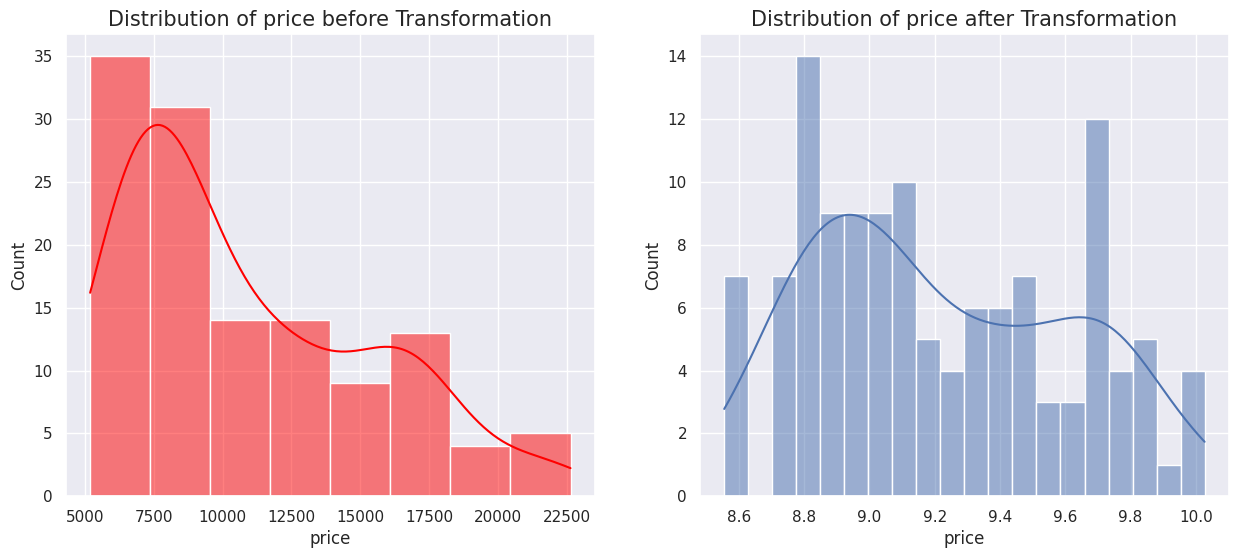

Skewness was 0.81 before & is 0.31 after Log transformation.


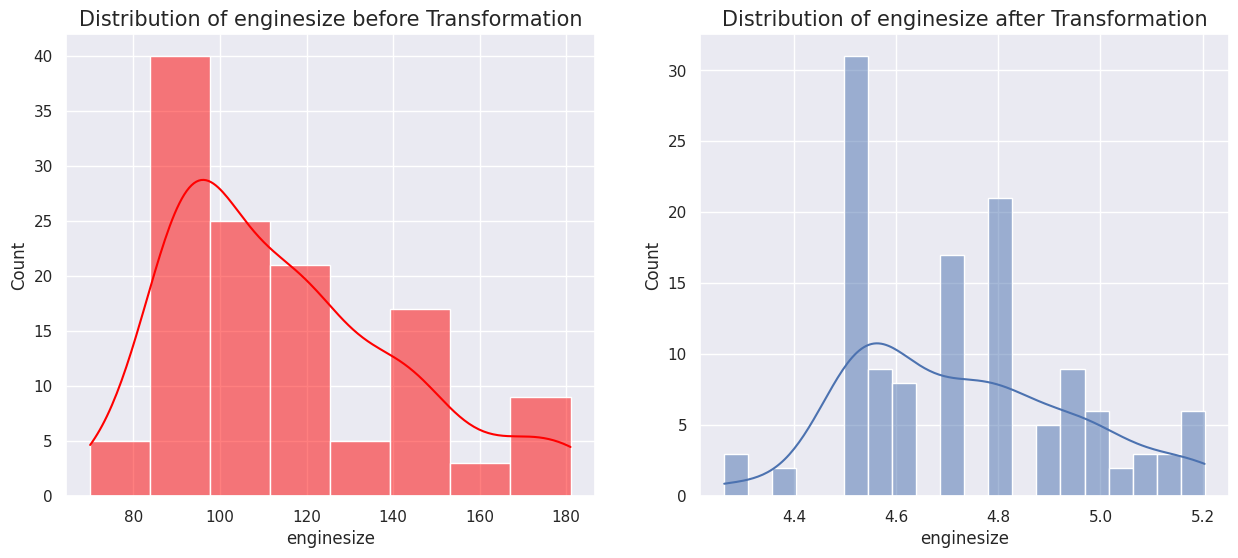

Skewness was 0.8 before & is 0.38 after Log transformation.


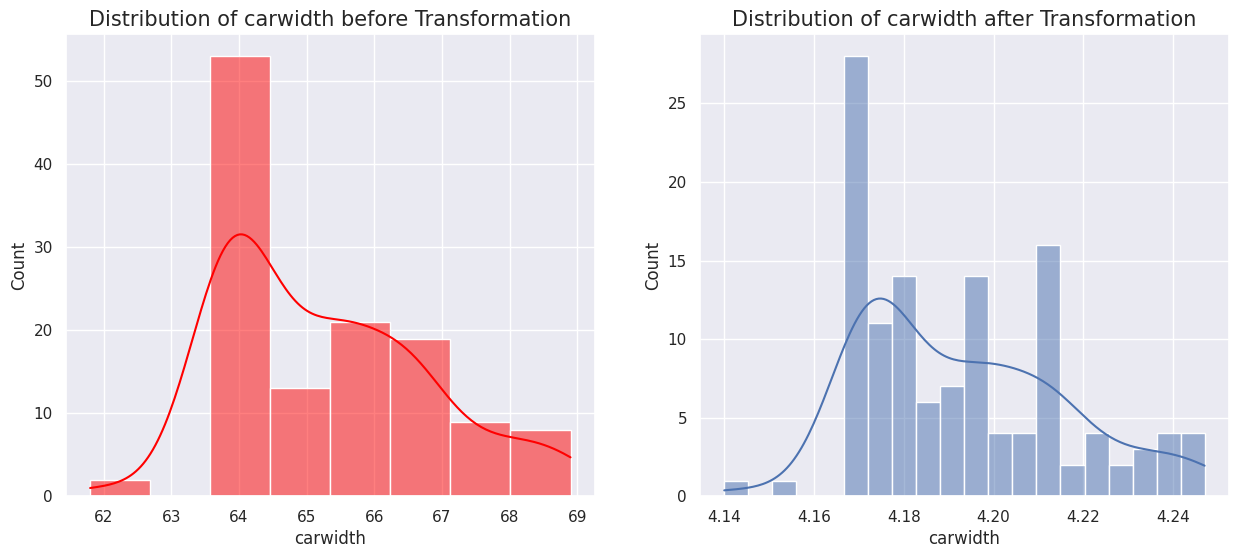

Skewness was 0.61 before & is 0.57 after Log transformation.


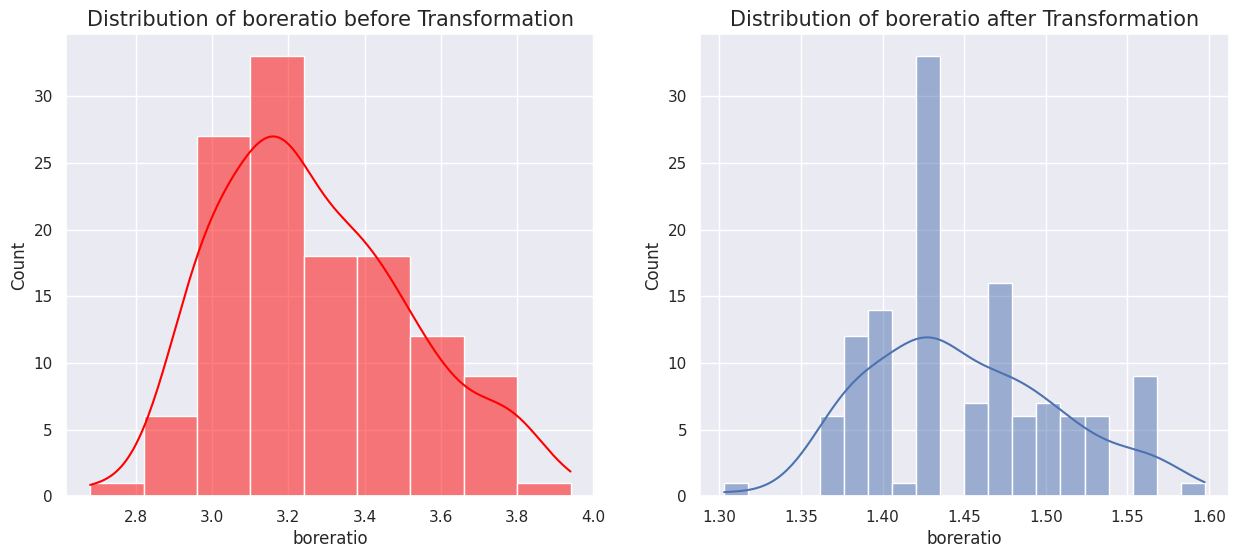

Skewness was 0.5 before & is 0.37 after Log transformation.


In [742]:
df1=logTrans(df1,features=columns_skew[0:6].index)

In [743]:
pd.options.display.max_rows=None
columns_skew=df1.skew(numeric_only=True).sort_values(ascending=False)
columns_skew

wheelbase           0.882696
carwidth            0.568926
horsepower          0.542908
curbweight          0.423268
enginesize          0.375814
boreratio           0.372452
price               0.311475
citympg             0.258318
carheight           0.246266
highwaympg          0.171459
peakrpm             0.152091
symboling           0.037612
carlength           0.021469
compressionratio   -0.444881
stroke             -0.475491
dtype: float64

In [744]:
data_info(df1)

,Cols,Dtype,N_Uniques,N_Nan,Unique_Values,Duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",1
1,fueltype,object,1,0,[gas],1
2,aspiration,object,2,0,"[std, turbo]",1
3,doornumber,object,2,0,"[four, two]",1
4,carbody,object,5,0,"[sedan, hatchback, wagon, convertible, hardtop]",1
5,drivewheel,object,3,0,"[fwd, rwd, 4wd]",1
6,enginelocation,object,1,0,[front],1
7,wheelbase,float64,32,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",1
8,carlength,float64,52,0,"[157.3, 188.8, 176.2, 166.3, 186.6, 177.8, 165...",1
9,carwidth,float64,31,0,"[4.1713056033582285, 4.212127597878484, 4.1682...",1


In [745]:
df1=df1.drop(['fueltype','enginelocation',],axis=1)

## Encoding Categorical Columns

In [746]:
data_info(df1)

,Cols,Dtype,N_Uniques,N_Nan,Unique_Values,Duplicated
0,symboling,int64,6,0,"[1, 0, 2, 3, -1, -2]",1
1,aspiration,object,2,0,"[std, turbo]",1
2,doornumber,object,2,0,"[four, two]",1
3,carbody,object,5,0,"[sedan, hatchback, wagon, convertible, hardtop]",1
4,drivewheel,object,3,0,"[fwd, rwd, 4wd]",1
5,wheelbase,float64,32,0,"[4.5591262474866845, 4.550714000192032, 4.5716...",1
6,carlength,float64,52,0,"[157.3, 188.8, 176.2, 166.3, 186.6, 177.8, 165...",1
7,carwidth,float64,31,0,"[4.1713056033582285, 4.212127597878484, 4.1682...",1
8,carheight,float64,37,0,"[52.0, 54.1, 50.8, 54.5, 55.5, 54.3, 56.1, 52....",1
9,curbweight,int64,108,0,"[2385, 1918, 1989, 2548, 1876, 2380, 2024, 253...",1


In [747]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1['aspiration_LE']=LE.fit_transform(df1['aspiration'])
df1['doornumber_LE']=LE.fit_transform(df1['doornumber'])
df1['drivewheel_LE']=LE.fit_transform(df1['drivewheel'])
df1['enginetype_LE']=LE.fit_transform(df1['enginetype'])
df1['cylindernumber_LE']=LE.fit_transform(df1['cylindernumber'])
df1['fuelsystem_LE']=LE.fit_transform(df1['fuelsystem'])

In [748]:
carbody_rank=['wagon','hatchback','convertible','sedan','hardtop']
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder(categories=[carbody_rank])
df1['carbody_OE']=OE.fit_transform(df1[['carbody']]).astype(int)

In [751]:
pd.options.display.max_rows=10
pd.options.display.max_columns=None
df1.head()

,symboling,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_LE,doornumber_LE,drivewheel_LE,enginetype_LE,cylindernumber_LE,fuelsystem_LE,carbody_OE
0,3,std,two,convertible,rwd,4.495355,168.8,4.175925,48.8,2548,dohc,four,4.875197,mpfi,1.497388,2.68,9.0,4.718499,5000,21,27,9.510149,0,1,2,0,1,3,2
1,3,std,two,convertible,rwd,4.495355,168.8,4.175925,48.8,2548,dohc,four,4.875197,mpfi,1.497388,2.68,9.0,4.718499,5000,21,27,9.711176,0,1,2,0,1,3,2
2,1,std,two,hatchback,rwd,4.559126,171.2,4.197202,52.4,2823,ohcv,six,5.030438,mpfi,1.302913,3.47,9.0,5.043425,5000,19,26,9.711176,0,1,2,2,2,3,1
3,2,std,four,sedan,fwd,4.613138,176.6,4.207673,54.3,2337,ohc,four,4.700480,mpfi,1.432701,3.40,10.0,4.634729,5500,24,30,9.543306,0,0,1,1,1,3,3
4,2,std,four,sedan,4wd,4.609162,176.6,4.210645,54.3,2824,ohc,five,4.919981,mpfi,1.432701,3.40,8.0,4.753590,5500,18,22,9.767152,0,0,0,1,0,3,3


##Dropping Categorical Columns

In [752]:
df_final=df1.copy()

In [753]:
df_final=df_final.drop(['aspiration','doornumber','drivewheel','enginetype','cylindernumber','fuelsystem','carbody'],axis=1)

In [754]:
df_final.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_LE,doornumber_LE,drivewheel_LE,enginetype_LE,cylindernumber_LE,fuelsystem_LE,carbody_OE
0,3,4.495355,168.8,4.175925,48.8,2548,4.875197,1.497388,2.68,9.0,4.718499,5000,21,27,9.510149,0,1,2,0,1,3,2
1,3,4.495355,168.8,4.175925,48.8,2548,4.875197,1.497388,2.68,9.0,4.718499,5000,21,27,9.711176,0,1,2,0,1,3,2
2,1,4.559126,171.2,4.197202,52.4,2823,5.030438,1.302913,3.47,9.0,5.043425,5000,19,26,9.711176,0,1,2,2,2,3,1
3,2,4.613138,176.6,4.207673,54.3,2337,4.700480,1.432701,3.40,10.0,4.634729,5500,24,30,9.543306,0,0,1,1,1,3,3
4,2,4.609162,176.6,4.210645,54.3,2824,4.919981,1.432701,3.40,8.0,4.753590,5500,18,22,9.767152,0,0,0,1,0,3,3


In [755]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          125 non-null    int64  
 1   wheelbase          125 non-null    float64
 2   carlength          125 non-null    float64
 3   carwidth           125 non-null    float64
 4   carheight          125 non-null    float64
 5   curbweight         125 non-null    int64  
 6   enginesize         125 non-null    float64
 7   boreratio          125 non-null    float64
 8   stroke             125 non-null    float64
 9   compressionratio   125 non-null    float64
 10  horsepower         125 non-null    float64
 11  peakrpm            125 non-null    int64  
 12  citympg            125 non-null    int64  
 13  highwaympg         125 non-null    int64  
 14  price              125 non-null    float64
 15  aspiration_LE      125 non-null    int64  
 16  doornumber_LE      125 non